# VOLCANO PLOT FOR THE MIRNA ANALYSIS
We used data generated from the EdgeR software.It includes all the lifestages of ***G. pallidipes*** a vector for african trypanosomiasis. The method demonstates the expression profile of miRNA genes in two consecutive  developmental stages(larva and pupa,pupa and teneral male, pupa and teneral female, teneral male and non-teneral male, teneral female and non-teneral female, gravid female and non gravid female. we identified two different type of miRNA genes:
1. Stage-specific miRNA genes
2. Sex-specific miRNA genes

The volcanoplots represents expression profiles for miRNA genes, with the  <font color='red'>red</font> representing highly expressed genes and the <font color='black'>black</font> representing non significantly expressed genes.
reference : https://academic.oup.com/bioinformaticsadvances/article/2/1/vbab047/6486525?login=true


## methods used ##

**loading software**

uploaded the software :

``import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np
import pandas as pd``

**Volcanoplot algorithm**

``data = pd.read_csv('file') 
def plot_volcano(adjust=False, **kwargs**):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['logFC'][data['PValue']>=threshold], -np.log10(data['PValue'][data['PValue']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['logFC'][data['PValue']<threshold], -np.log10(data['PValue'][data['PValue']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Row.names'][data['PValue']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.text(3, 11, 'sample one ', 
         fontsize = 18, color = 'black')
    plt.text(-12.0, 11, 'sample two', 
         fontsize = 18, color = 'black')
    plt.xlabel('Fold Change')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs**))
        plt.title('title')
    else:
        plt.title('no title')'``


In [1]:
#import libraries required for visuliasation
import numpy as np
import pandas as pd 
#import matplotlab 
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles,venn2
import matplotlib.pyplot as plt
from bioinfokit import analys,visuz

In [2]:
#Drops the null values 
data=pd.read_csv('Adultfemale_vs_Adultmale_Analysis.csv')
# drop the null value 
adfem_vs_admale=data.dropna(how="any")
#eaxmin data set 
adfem_vs_admale.head()


,Unnamed: 0,Row.names,logFC,logCPM,LR,PValue,FDR,Adultfemale_Rep1,Adultfemale_Rep2,Adultfemale_Rep3,Adultmale_Rep1,Adultmale_Rep2,Adultmale_Rep3,de
0,124,miR-l,-14.096680,10.094316,211.737968,5.737170e-48,7.171462e-46,2193.688351,1747.432127,2230.829783,0.000000,0.0,0.0,-1
1,76,miR-5-5p,-9.100664,7.987448,57.330890,3.683247e-14,2.302030e-12,421.099975,681.924733,295.549424,2.537401,0.0,0.0,-1
2,77,miR-61-3p,-8.924146,7.812583,55.925145,7.528351e-14,3.136813e-12,352.753906,575.373993,315.442173,2.537401,0.0,0.0,-1
3,116,miR-c,-8.734300,7.623940,44.843954,2.133787e-11,6.668083e-10,608.500487,191.791331,289.865781,2.537401,0.0,0.0,-1
4,78,miR-6-3p,-10.356030,6.382513,43.533122,4.168440e-11,1.042110e-09,141.101562,170.481183,147.774712,0.000000,0.0,0.0,-1


In [3]:
adfem_vs_admale.columns

Index(['Unnamed: 0', 'Row.names', 'logFC', 'logCPM', 'LR', 'PValue', 'FDR',
       'Adultfemale_Rep1', 'Adultfemale_Rep2', 'Adultfemale_Rep3',
       'Adultmale_Rep1', 'Adultmale_Rep2', 'Adultmale_Rep3', 'de'],
      dtype='object')

In [4]:
adfem_vs_admale2=pd.DataFrame(adfem_vs_admale[["Row.names", "logFC",'PValue']])
adfem_vs_admale2

,Row.names,logFC,PValue
0,miR-l,-14.096680,5.737170e-48
1,miR-5-5p,-9.100664,3.683247e-14
2,miR-61-3p,-8.924146,7.528351e-14
3,miR-c,-8.734300,2.133787e-11
4,miR-6-3p,-10.356030,4.168440e-11
...,...,...,...
120,miR-274-5p,-0.008781,9.833143e-01
121,miR-193-3p,-0.011895,9.853746e-01
122,miR-965-3p,0.009572,9.900992e-01
123,miR-995-3p,0.004003,9.934107e-01


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


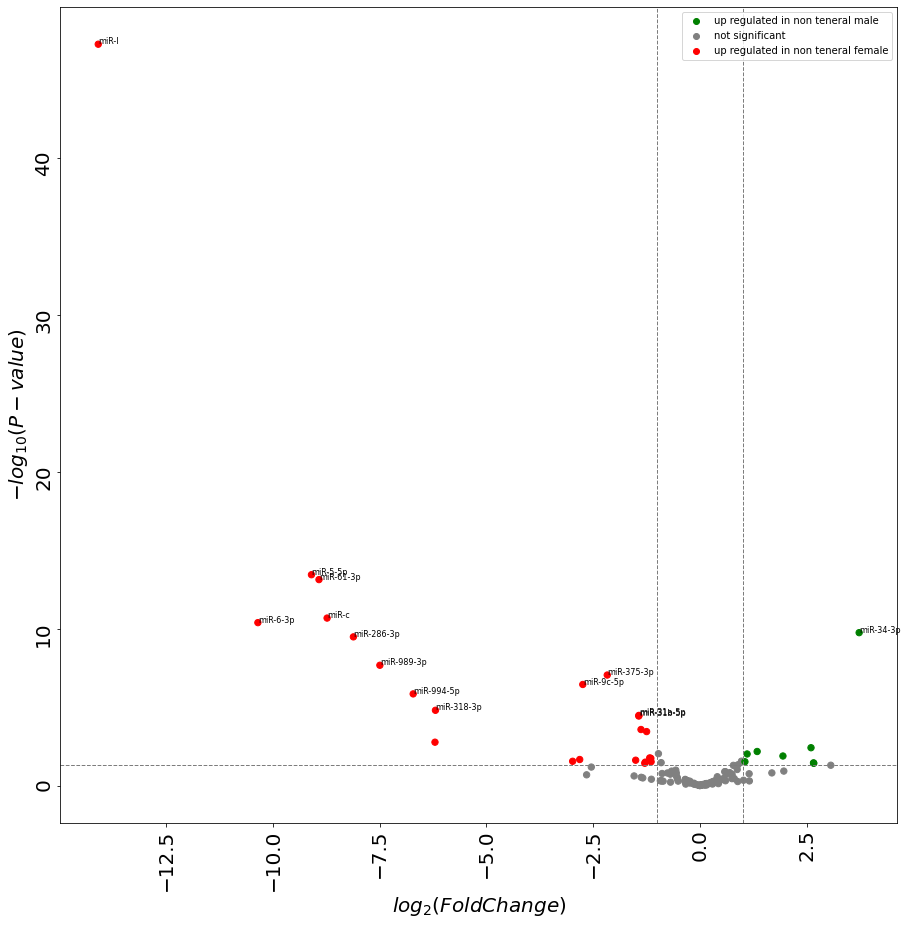

In [5]:
#show statistically significant differentially expressed genes based on thresholds
visuz.gene_exp.volcano(df=adfem_vs_admale2,lfc='logFC',pv='PValue',geneid="Row.names",genenames=("miR-l","miR-5-5p","miR-61-3p","miR-c","miR-6-3p","miR-34-3p","miR-286-3p","miR-989-3p","miR-375-3p","miR-9c-5p","miR-994-5p","miR-318-3p","miR-31a-5p","miR-31b-5p"),gstyle=1,gfont=8.0, show=True,dim=(15,15),sign_line=True,dotsize=40,axtickfontsize=20,axlabelfontsize=20,r=600,plotlegend=True,figname="non teneral male vs non teneral female",legendlabels= ['up regulated in non teneral male', 'not significant', 'up regulated in non teneral female'],legendpos='upper right',figtype='png')

## PLOTTING VOLCANO PLOTS USING MATPLOTLIB

loading data for analysis

In [6]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np
import pandas as pd

# STAGE SPECIFIC MIRNA GENES 

## volcano plot representing the expression profile for Larva versus Pupa
This volcano plot represents the expression profile for larva and pupa two consecutive life stages of *G. pallidipes*. The red dots represents the up-regulated miRNA genes in the different stages. while the black dots reprensented non significant miRNA genes. The volcano plot was designed using matliplot.

In [7]:
data = pd.read_csv('Larvae_vs_Pupae_Analysis.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['logFC'][data['PValue']>=threshold], -np.log10(data['PValue'][data['PValue']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['logFC'][data['PValue']<threshold], -np.log10(data['PValue'][data['PValue']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Row.names'][data['PValue']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.text(3, 11, 'Pupa', 
         fontsize = 18, color = 'black')
    plt.text(-12.0, 11, 'Larva', 
         fontsize = 18, color = 'black')
    plt.xlabel('Fold Change')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
        plt.title(' A. Larva versus pupa')
    else:
        plt.title('no title')
    

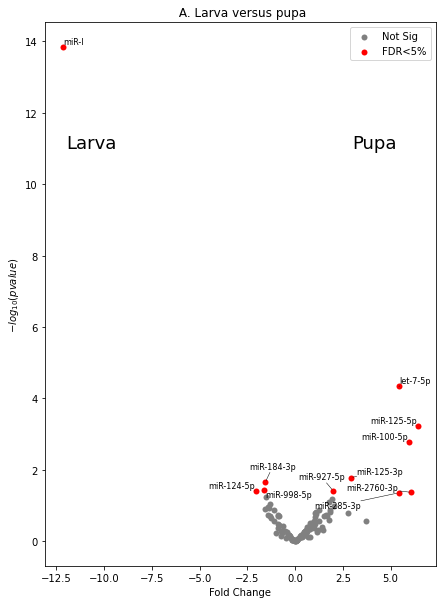

In [8]:
plot_volcano(adjust=True)    

## volcano plot representing the expression profile for Pupa versus teneral female 
This volcano plot represents the expression profile for pupa and teneral female adult (young adult) two consecutive life stages of *G. pallidipes*. The red dots represents the up-regulated miRNA genes in the different stages. while the black dots reprensented non significant miRNA genes. The volcano plot was designed using matliplot.

In [9]:
data = pd.read_csv('Pupae_vs_Teneralfemale_Analysis.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['logFC'][data['PValue']>=threshold], -np.log10(data['PValue'][data['PValue']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['logFC'][data['PValue']<threshold], -np.log10(data['PValue'][data['PValue']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Row.names'][data['PValue']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.text(-10, 14, 'Pupa', 
         fontsize = 18, color = 'black')
    plt.text(3, 14, ' Teneral female', 
         fontsize = 18, color = 'black')
    plt.xlabel('Fold Change')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
        plt.title(' B. Pupa vs Teneral female')
    else:
        plt.title('no title')
        
        

   
  

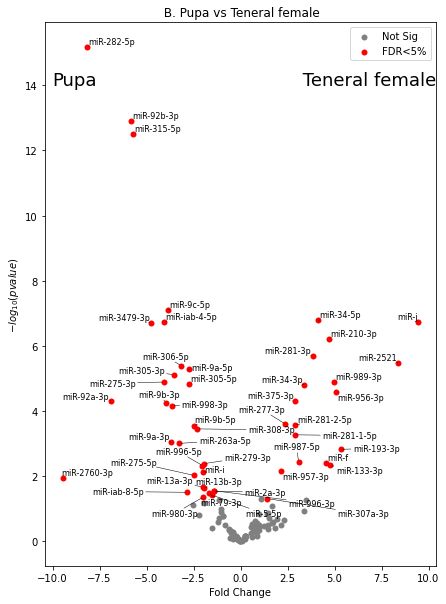

In [10]:
plot_volcano(adjust=True)  

## volcano plot representing the expression profile for Pupa versus teneral male 
This volcano plot represents the expression profile for pupa and teneral male adult (young adult) two consecutive life stages of *G. pallidipes*. The red dots represents the up-regulated miRNA genes in the different stages. while the black dots reprensented non significant miRNA genes. The volcano plot was designed using matliplot.

In [11]:
data = pd.read_csv('Pupae_vs_Teneralmale_Analysis.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['logFC'][data['PValue']>=threshold], -np.log10(data['PValue'][data['PValue']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['logFC'][data['PValue']<threshold], -np.log10(data['PValue'][data['PValue']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Row.names'][data['PValue']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.text(-10, 16, 'Pupa', 
         fontsize = 18, color = 'black')
    plt.text(2.8, 16, ' Teneral male', 
         fontsize = 18, color = 'black')
    plt.xlabel('Fold Change')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
        plt.title(' C. Pupa vs Teneral male')
    else:
        plt.title('no title')
        

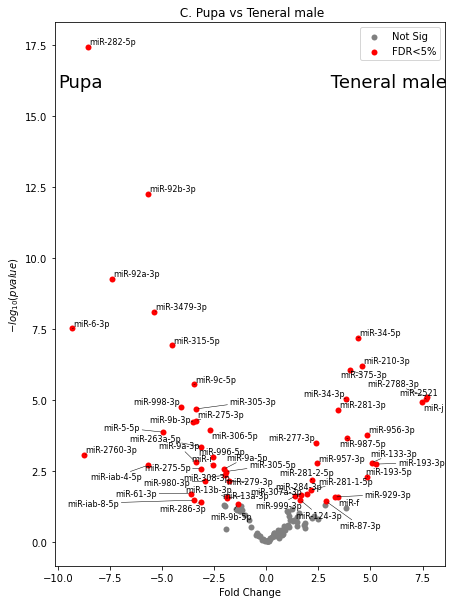

In [12]:
plot_volcano(adjust=True)  

## volcano plot representing the expression profile for teneral female  versus non teneral female 
This volcano plot represents the expression profile for teneral female (young adult) and non-teneral female adult (adult) two consecutive life stages of *G. pallidipes*. The red dots represents the up-regulated miRNA genes in the different stages. while the black dots reprensented non significant miRNA genes. The volcano plot was designed using matliplot.

In [13]:
data = pd.read_csv('Teneralfemale_vs_Adultfemale_Analysis.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['logFC'][data['PValue']>=threshold], -np.log10(data['PValue'][data['PValue']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['logFC'][data['PValue']<threshold], -np.log10(data['PValue'][data['PValue']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Row.names'][data['PValue']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.text(-4, 60, 'Teneral female', 
         fontsize = 18, color = 'black')
    plt.text(5, 60, 'Non teneral female', 
         fontsize = 18, color = 'black')
    plt.xlabel('Fold Change')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
        plt.title(' D. Tenaral female  vs non-teneral female')
    else:
        plt.title('no title')
        

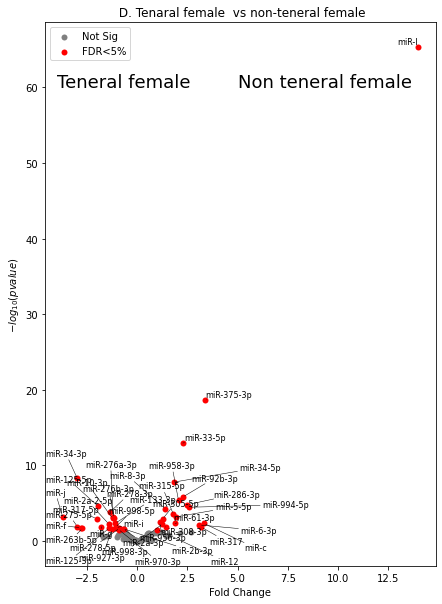

In [14]:
plot_volcano(adjust=True)  

## volcano plot representing the expression profile for teneral male  versus non teneral male 
This volcano plot represents the expression profile for teneral male (young adult) and non-teneral male adult (adult) two consecutive life stages of *G. pallidipes*. The red dots represents the up-regulated miRNA genes in the different stages. while the black dots reprensented non significant miRNA genes. The volcano plot was designed using matliplot.

In [15]:
data = pd.read_csv('Teneralmale_vs_Adultmale_Analysis.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['logFC'][data['PValue']>=threshold], -np.log10(data['PValue'][data['PValue']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['logFC'][data['PValue']<threshold], -np.log10(data['PValue'][data['PValue']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Row.names'][data['PValue']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.text(-1, 10, 'Non-teneral male', 
         fontsize = 18, color = 'black')
    plt.text(-7.0, 10, 'Teneral male', 
         fontsize = 18, color = 'black')
    plt.xlabel('Fold Change')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
        plt.title(' E. Teneral male vs Non-tenral male')
    else:
        plt.title('no title')
        
        

   
    

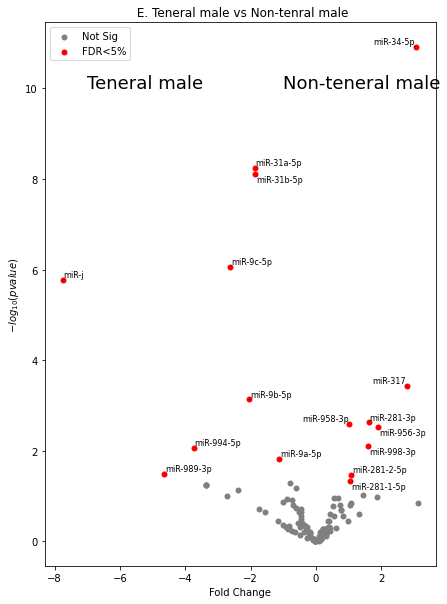

In [16]:
plot_volcano(adjust=True)  

## volcano plot representing the expression profile for Gravid female vs non gravid female  
This volcano plot represents the expression profile for miRNA genes in gravid female (impregranated female) and Non-gravdid female (virgin female). The red dots represents the up-regulated genes in the different stages. while the black dots reprensented non significant miRNA genes. The volcano plot was designed using matliplot. 

In [17]:
data = pd.read_csv('gravid_vs_nongravid.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['logFC'][data['PValue']>=threshold], -np.log10(data['PValue'][data['PValue']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['logFC'][data['PValue']<threshold], -np.log10(data['PValue'][data['PValue']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Row.names'][data['PValue']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.text(-4, 25, 'Non-gravid female', 
         fontsize = 18, color = 'black')
    plt.text(6, 25, 'Gravid female', 
         fontsize = 18, color = 'black')
    plt.xlabel('Fold Change')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
        plt.title(' F. Gravid female vs non-gravid female')
    else:
        plt.title('no title')
        

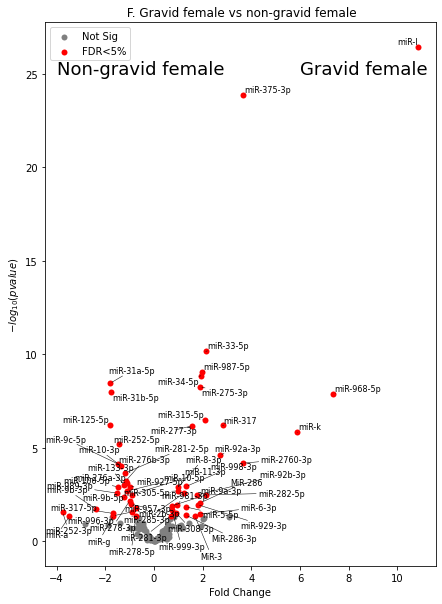

In [18]:
plot_volcano(adjust=True)

# SEX-SPECIFIC MIRNA GENES 

## volcano plot representing the expression profile for adult female versus adult male 
This volcano plot represents the expression profile for adult species that include young adult female (teneral female) and adult male (teneral male). The red dots represents the up-regulated genes in the different stages. while the black dots reprensented non significant miRNA genes.
The volcano plot was designed using matliplot. 

In [19]:
data = pd.read_csv('Teneralfemale_vs_Teneralmale_Analysis.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['logFC'][data['PValue']>=threshold], -np.log10(data['PValue'][data['PValue']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['logFC'][data['PValue']<threshold], -np.log10(data['PValue'][data['PValue']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Row.names'][data['PValue']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.text(-8, 4.5, 'Teneral female', 
         fontsize = 18, color = 'black')
    plt.text(-1.7, 4.5, 'Teneral male', 
         fontsize = 18, color = 'black')
    plt.xlabel('Fold Change')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
        plt.title(' A. Teneral female vs teneral male')
    else:
        plt.title('no title')

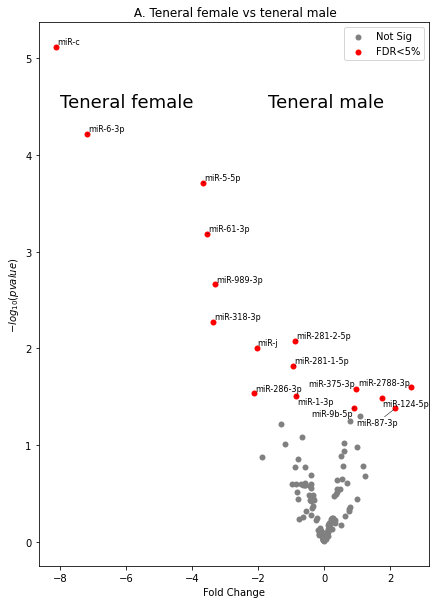

In [20]:
plot_volcano(adjust=True)

## volcano plot representing the expression profile for adult female versus adult male 
This volcano plot represents the expression profile for adult species that include adult female (non-teneral female) and adult male (non-teneral male). The red dots represents the up-regulated genes in the different stages. while the black dots reprensented non significant miRNA genes.
The volcano plot was designed using matliplot. 

In [21]:
 data = pd.read_csv('Adultfemale_vs_Adultmale_Analysis.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['logFC'][data['PValue']>=threshold], -np.log10(data['PValue'][data['PValue']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['logFC'][data['PValue']<threshold], -np.log10(data['PValue'][data['PValue']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Row.names'][data['PValue']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.text(-1.9, 40, 'Adult male', 
         fontsize = 18, color = 'black')
    plt.text(-14.0, 40, 'Adult female', 
         fontsize = 18, color = 'black')
    plt.xlabel('Fold Change')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
        plt.title(' B. Adult female vs Adult male')
    else:
        plt.title('no title')    

   
    

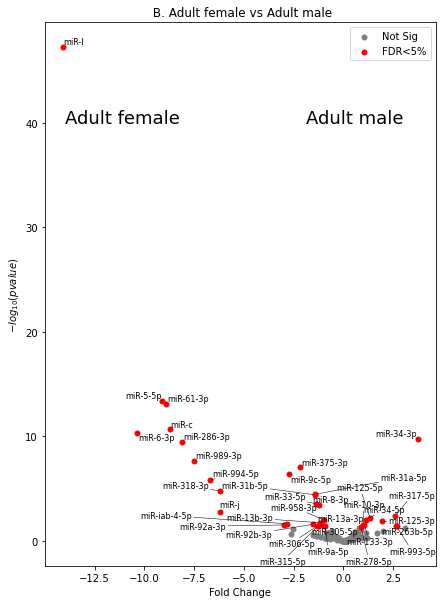

In [22]:
plot_volcano(adjust=True)